In [42]:
import numpy as np
import matplotlib.pyplot as plot
import sys
from scipy.constants import c
from astropy.cosmology import LambdaCDM
from astropy.cosmology import w0waCDM
from astropy import units as u
sys.path.append("../")

In [43]:
from pyACC.cosmology.distances import Distances

In [44]:
def hfunc_from_cosmology(z, cosmology):
    return cosmology.H(z).value

In [ ]:
z_values = np.linspace(0, 100, 1000)
dc= [fiducial_cosmology2.comoving_distance(z).value for z in z_values]
fiducial_cosmology2 = w0waCDM(H0=70, Om0=0.3, Ode0=0.7, w0=-1.0, wa=0.2)
fiducial_cosmology1 = LambdaCDM(H0= 70 , Om0= 0.3 , Ode0= 0.7)
Distanza2 = Distances(lambda z: hfunc_from_cosmology(z, fiducial_cosmology2))
distanze_comoventi2 = np.array([Distanza2.comoving_distance(z) for z in z_values])
Distanza1 = Distances(lambda z: hfunc_from_cosmology(z, fiducial_cosmology1))
distanze_comoventi1 = np.array([Distanza1.comoving_distance(z) for z in z_values])

In [46]:
d_ang_astropy = fiducial_cosmology2.angular_diameter_distance(z_values).value 
distanze_angolari2 = np.array([Distanza2.angular_distance(z) for z in z_values])
distanze_angolari1 = np.array([Distanza1.angular_distance(z) for z in z_values])

In [47]:
c1 = c/1000 # km/s
d_hubble_astropy = fiducial_cosmology2.hubble_distance.value 
distanze_hubble_astropy = np.array([ c1 / hfunc_from_cosmology(z, fiducial_cosmology2) for z in z_values ])
distanze_hubble2= np.array([Distanza2.hubble_distance(z) for z in z_values])
distanze_hubble1= np.array([Distanza1.hubble_distance(z) for z in z_values])

In [48]:
d_lum_astropy = fiducial_cosmology2.luminosity_distance(z_values).value 
distanze_luminosita2 = np.array([Distanza2.luminosity_distance(z) for z in z_values])
distanze_luminosita1 = np.array([Distanza1.luminosity_distance(z) for z in z_values])

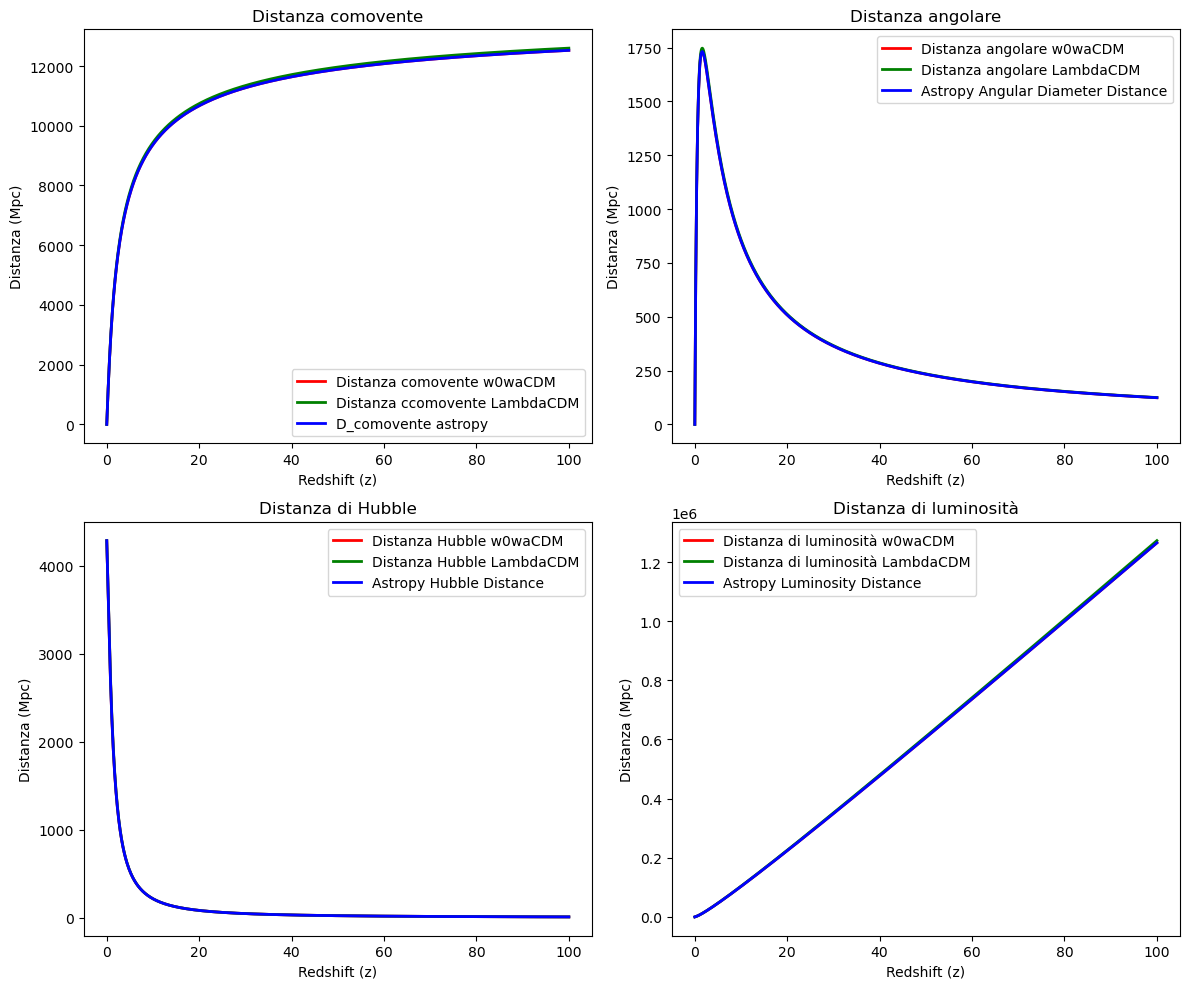

In [50]:
# Creo figura e assi 2x2
fig, axs = plot.subplots(2, 2, figsize=(12, 10))

# 1. Distanza comovente
axs[0, 0].plot(z_values, distanze_comoventi2, label='Distanza comovente w0waCDM', color='red', lw=2)
axs[0, 0].plot(z_values, distanze_comoventi1, label='Distanza ccomovente LambdaCDM', color='green', lw=2)
axs[0, 0].plot(z_values, dc, label='D_comovente astropy', color='blue', lw=2)
axs[0, 0].set_xlabel("Redshift (z)")
axs[0, 0].set_ylabel("Distanza (Mpc)")
axs[0, 0].set_title("Distanza comovente")
axs[0, 0].legend()

# 2. Distanza angolare
axs[0, 1].plot(z_values, distanze_angolari2, label='Distanza angolare w0waCDM', color='red', lw=2)
axs[0, 1].plot(z_values, distanze_angolari1, label='Distanza angolare LambdaCDM', color='green', lw=2)
axs[0, 1].plot(z_values, d_ang_astropy, label="Astropy Angular Diameter Distance", color='blue', lw=2)
axs[0, 1].set_xlabel("Redshift (z)")
axs[0, 1].set_ylabel("Distanza (Mpc)")
axs[0, 1].set_title("Distanza angolare")
axs[0, 1].legend()

# 3. Distanza di Hubble
axs[1, 0].plot(z_values, distanze_hubble2, label='Distanza Hubble w0waCDM', color='red', lw=2)
axs[1, 0].plot(z_values, distanze_hubble1, label='Distanza Hubble LambdaCDM', color='green', lw=2)
axs[1, 0].plot(z_values, distanze_hubble_astropy, label='Astropy Hubble Distance', color='blue', lw=2)
axs[1, 0].set_xlabel("Redshift (z)")
axs[1, 0].set_ylabel("Distanza (Mpc)")
axs[1, 0].set_title("Distanza di Hubble")
axs[1, 0].legend()

# 4. Distanza di luminosità
axs[1, 1].plot(z_values, distanze_luminosita2, label='Distanza di luminosità w0waCDM', color='red', lw=2)
axs[1, 1].plot(z_values, distanze_luminosita1, label='Distanza di luminosità LambdaCDM', color='green', lw=2)
axs[1, 1].plot(z_values, d_lum_astropy, label='Astropy Luminosity Distance', color='blue', lw=2)
axs[1, 1].set_xlabel("Redshift (z)")
axs[1, 1].set_ylabel("Distanza (Mpc)")
axs[1, 1].set_title("Distanza di luminosità")
axs[1, 1].legend()

# Ottimizza spaziatura
plot.tight_layout()
plot.show()